#### Importing Libraries

In [1]:

# Basic Libraries for Data organization, Statistical operations and Plotting# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import missingno as msno # Missing Data visualization
import seaborn as sns
from statistics import mean, stdev
sns.set(style="white")
%matplotlib inline
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
import itertools 
    
    
from sklearn.preprocessing import StandardScaler  # Helps us in Standardizing the data
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, average_precision_score # Evaluation                                                                                                             # metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
os.getcwd() #Checking  current working directory

'D:\\PHD_Final'

In [3]:
def load_Salesmane_data(filename):
    df_data = pd.read_excel(filename)
    return df_data
# Reading training data using pandas for excel
sales = load_Salesmane_data('Train.xlsx')

In [4]:
np.size(np.unique(sales.ReportID))

42582

In [5]:
sales.drop("ReportID", axis=1, inplace=True)  #Dropped 'Report Id column' coz it contains 42582 unique rows

In [6]:
# Generating dataset profile
pandas_profiling.ProfileReport(sales)

Number of variables,5
Number of observations,42582
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,40.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


#### Data Exploration

In [7]:
sales.head(5) #Checking First five rows

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
0,C21116,PR6112,182,1665,indeterminate
1,C21116,PR6112,182,1740,indeterminate
2,C21116,PR6253,101,1040,indeterminate
3,C21116,PR6253,283,4495,No
4,C21116,PR6294,108,1465,indeterminate


In [8]:
sales.tail(5) #Checking Last five rows

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
42577,C22284,PR6600,2079,5380,indeterminate
42578,C22284,PR6486,116848,66210,indeterminate
42579,C22284,PR6600,1431,3975,indeterminate
42580,C22284,PR6600,9790,22370,indeterminate
42581,C22284,PR6600,9147,20155,indeterminate


In [9]:
# Success
print("salesman dataset has {} data points with {} variables each.".format(*sales.shape)) #numbers of rows and columns in given dataset

salesman dataset has 42582 data points with 5 variables each.


In [10]:
pd.DataFrame(list(sales.columns.values),columns=['Columna_Name']) #printing column names in given data set

,Columna_Name
0,SalesPersonID
1,ProductID
2,Quantity
3,TotalSalesValue
4,Suspicious


In [11]:
sales.info() #Checking salesman data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42582 entries, 0 to 42581
Data columns (total 5 columns):
SalesPersonID      42582 non-null object
ProductID          42582 non-null object
Quantity           42582 non-null int64
TotalSalesValue    42582 non-null int64
Suspicious         42582 non-null object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


In [12]:
sales.describe() #basic statistical details like percentile, mean, std etc

,Quantity,TotalSalesValue
count,4.258200e+04,4.258200e+04
mean,4.910048e+03,1.620923e+04
std,9.833621e+04,5.997195e+04
min,3.300000e+01,5.980000e+02
25%,1.110000e+02,1.345000e+03
50%,2.060000e+02,2.980000e+03
75%,1.136000e+03,1.076500e+04
max,1.970813e+07,3.953985e+06


In [13]:
# nunique() return Series with number of distinct observations
print("The total number of unique records in '{}' is : {}".format('SalesPersonID',sales['SalesPersonID'].nunique()))
print("The total number of unique records in '{}' is : {}".format('ProductID',sales['ProductID'].nunique()))
print("The total number of unique records in '{}' is : {}".format('Suspicious',sales['Suspicious'].nunique()))

The total number of unique records in 'SalesPersonID' is : 992
The total number of unique records in 'ProductID' is : 593
The total number of unique records in 'Suspicious' is : 3


In [14]:
sales.dtypes

SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
Suspicious         object
dtype: object

In [15]:
sales.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious'],
      dtype='object')

<Figure size 1600x600 with 0 Axes>

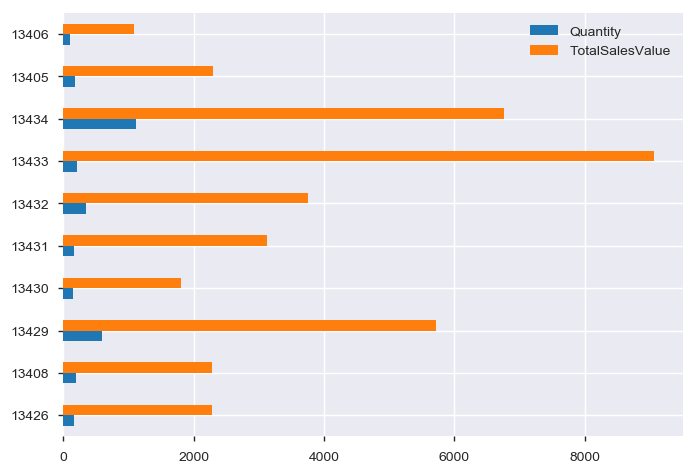

In [16]:
plt.figure(figsize=(16,6))
sales.sort_values(['SalesPersonID'], ascending=False).head(10).plot(kind="barh")
plt.show()

<Figure size 1600x600 with 0 Axes>

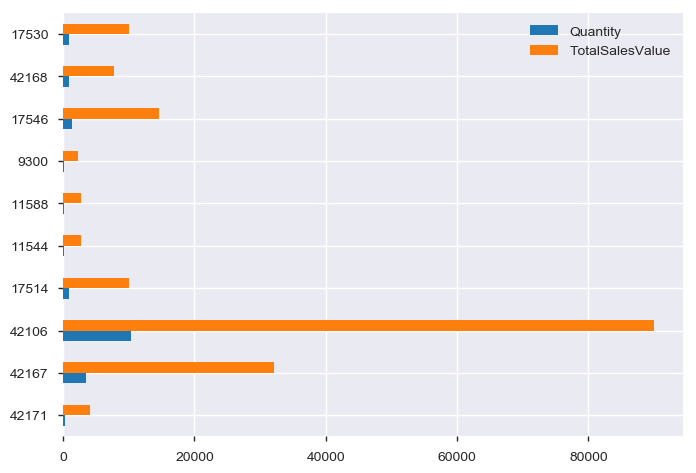

In [17]:
plt.figure(figsize=(16,6))
sales.sort_values(['ProductID'], ascending=False).head(10).plot(kind="barh")
plt.show()

<Figure size 1600x600 with 0 Axes>

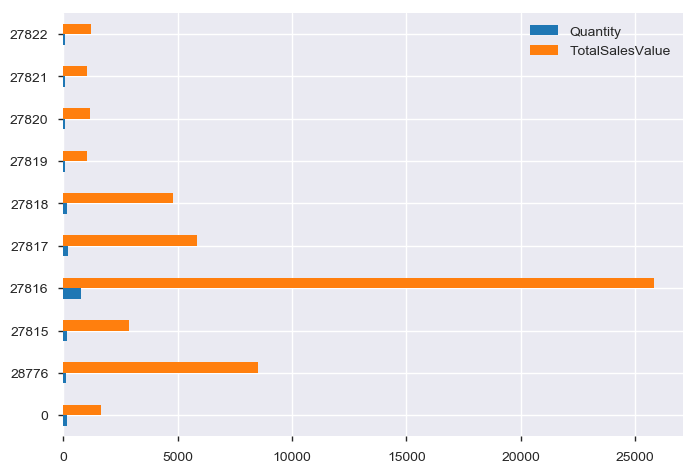

In [18]:
plt.figure(figsize=(16,6))
sales.sort_values(['Suspicious'], ascending=False).head(10).plot(kind="barh")
plt.show()

#### Checking the missing values by using MSNO plot

<Figure size 1600x600 with 0 Axes>

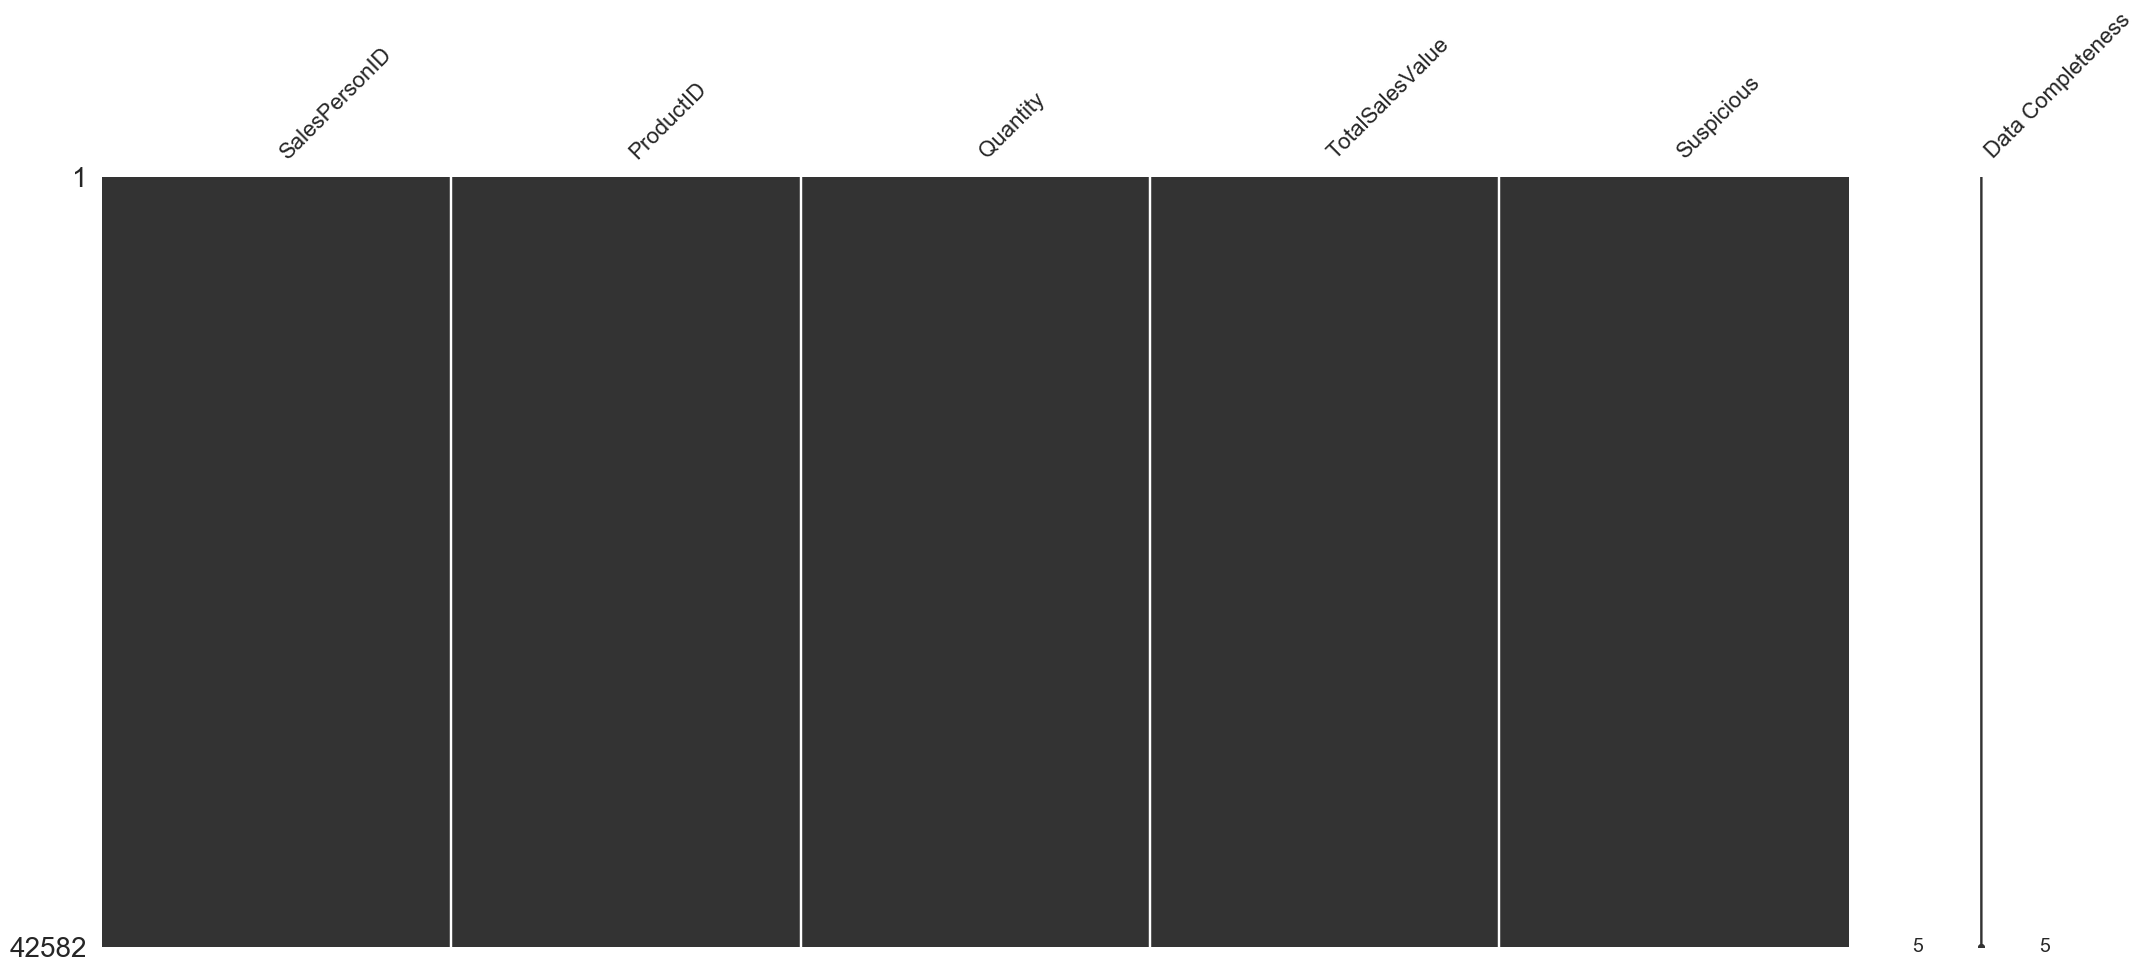

SalesPersonID has NO missing value!
ProductID has NO missing value!
Quantity has NO missing value!
TotalSalesValue has NO missing value!
Suspicious has NO missing value!


In [19]:
# Checking the missing values 
plt.figure(figsize=(16,6))
msno.matrix(sales,labels=True,color=(0.20,0.20,0.20))
plt.show()
for c in sales.columns:
    miss = sales[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

<Figure size 10000x20000 with 0 Axes>

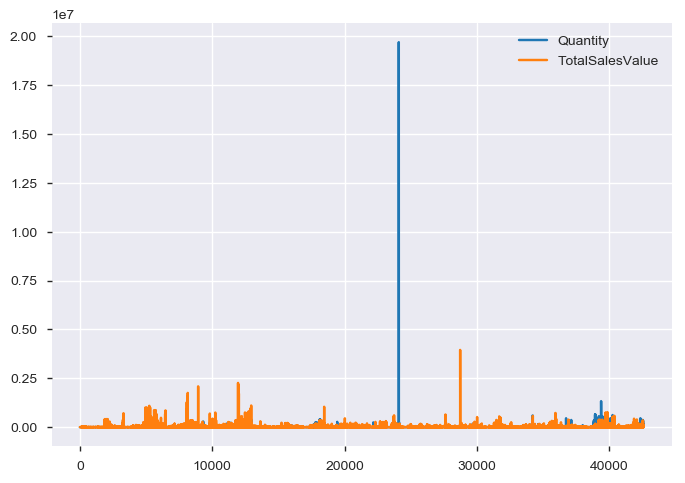

In [20]:
# Quantity vs Total Sales
plt.figure(figsize=(100,200))
sales.plot()
plt.show()

#### Counter plot for "Suspicious"

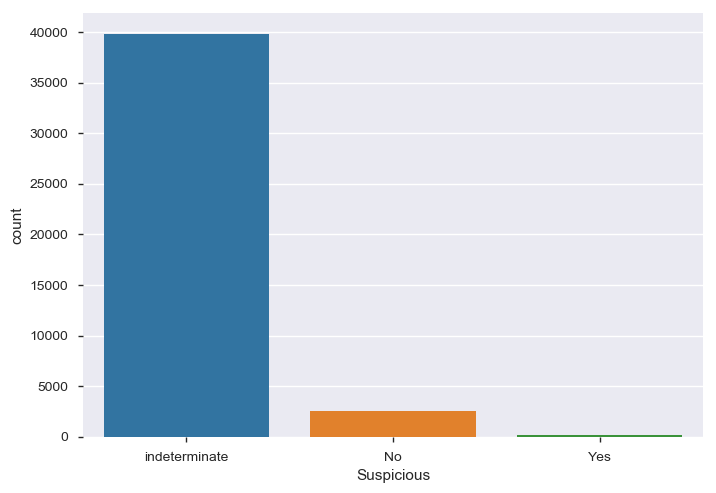

indeterminate    93.574750
No                6.000188
Yes               0.425062
Name: Suspicious, dtype: float64

In [21]:
sales['Suspicious'].value_counts()
sns.countplot(x='Suspicious',data=sales)
plt.show()
(sales["Suspicious"].value_counts()/sales.shape[0]*100)

- It seems that there are 3 unique values in this column
- The top most occuring value is 'indeterminate' with a Frequency of 93%.
- The leastoccuring value is 'Yes' with a Frequency of 0.42%.


#### Top 10 sales persons

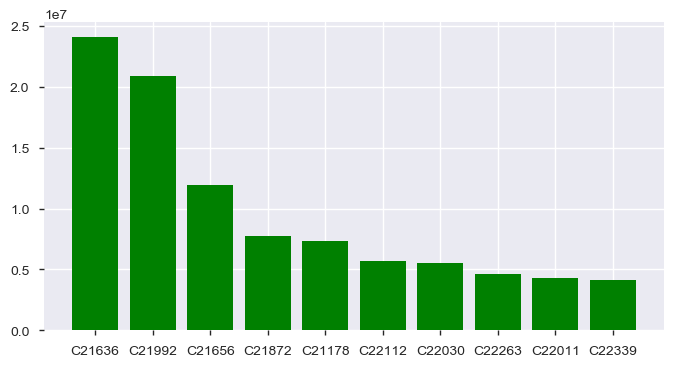

Top ten guys total contribution by quantity


13.948894548010024

In [22]:
#Top ten sales based on quantity
plt.figure(figsize=(8,4))
top_ten_salesid_quantity=sales.groupby(['SalesPersonID']).sum().sort_values(by='Quantity',ascending=False).head(10)
plt.bar(x=top_ten_salesid_quantity.index,height=top_ten_salesid_quantity['Quantity'],color='green')
plt.show()

#top ten guys total contribution by quantity
print("Top ten guys total contribution by quantity")
((top_ten_salesid_quantity['Quantity']/sales['TotalSalesValue'].sum())*100).sum() 

top ten guys contributed 13.948894548010024 percent to the total quantity sold.

In [23]:
pd.DataFrame(top_ten_salesid_quantity)

,Quantity,TotalSalesValue
SalesPersonID,,
C21636,24060951,15855820
C21992,20897797,2056895
C21656,11943852,5441680
C21872,7731866,16438165
C21178,7357299,26522900
C22112,5711293,1456425
C22030,5525254,20705860
C22263,4628186,7814675
C22011,4260588,1788435


#### Last 10 sales persons

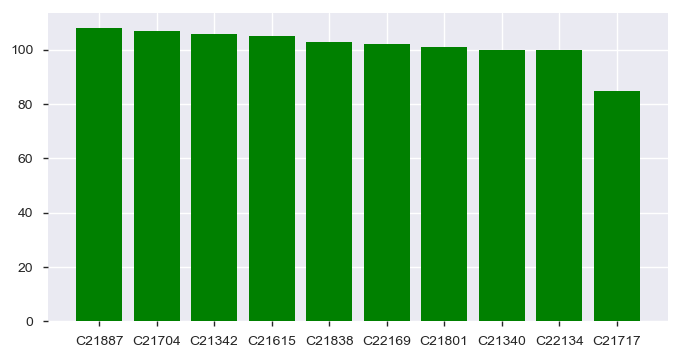

Last ten guys total contribution by quantity


0.00014734402037043685

In [24]:
#Last ten sales based on quantity
plt.figure(figsize=(8,4))
last_ten_salesid_quantity=sales.groupby(['SalesPersonID']).sum().sort_values(by='Quantity',ascending=False).tail(10)
plt.bar(x=last_ten_salesid_quantity.index,height=last_ten_salesid_quantity['Quantity'],color='green')
plt.show()

#bottom ten guys total contribution by quantity
print("Last ten guys total contribution by quantity")
((last_ten_salesid_quantity['Quantity']/sales['TotalSalesValue'].sum())*100).sum()


Bottom ten guys contributed 0.00014734402037043685 percent to the total quantity sold.

In [25]:
pd.DataFrame(last_ten_salesid_quantity)

,Quantity,TotalSalesValue
SalesPersonID,,
C21887,108,1025
C21704,107,2430
C21342,106,2290
C21615,105,1660
C21838,103,1075
C22169,102,1120
C21801,101,1030
C21340,100,1230
C22134,100,1010


In [26]:
# Groupped total sales value by Prodcut Id
sal_prod_totalSal=sales[['ProductID','TotalSalesValue' ]]
plotting_group=sal_prod_totalSal.groupby('ProductID')
print(plotting_group.size().count())
print("="*30)
print(plotting_group.size().head(15))

593
ProductID
PR6112    169
PR6113     24
PR6114    130
PR6115    533
PR6116    315
PR6117    133
PR6118      8
PR6119     60
PR6120     17
PR6121     18
PR6122      2
PR6123     45
PR6124     38
PR6125     25
PR6126     27
dtype: int64


In [27]:
#Sum of Total sales value by its product Id
total_sales=plotting_group.sum()
pd.DataFrame(total_sales).head(15).T

ProductID,PR6112,PR6113,PR6114,PR6115,PR6116,PR6117,PR6118,PR6119,PR6120,PR6121,PR6122,PR6123,PR6124,PR6125,PR6126
TotalSalesValue,1162050,121825,1155935,12118200,5104310,1661935,83275,524440,104045,432915,4985,854150,665590,146875,212825


In [28]:
# Groupped totalsales value by Sales Id
salesperson_totalsales = sales.groupby('SalesPersonID').mean()['TotalSalesValue']
pd.DataFrame(salesperson_totalsales).head(10)

,TotalSalesValue
SalesPersonID,
C21116,2408.000000
C21118,199196.000000
C21119,1168.750000
C21121,6159.687500
C21122,1865.357143
C21123,12335.000000
C21124,23590.757576
C21126,15167.500000
C21127,19312.500000


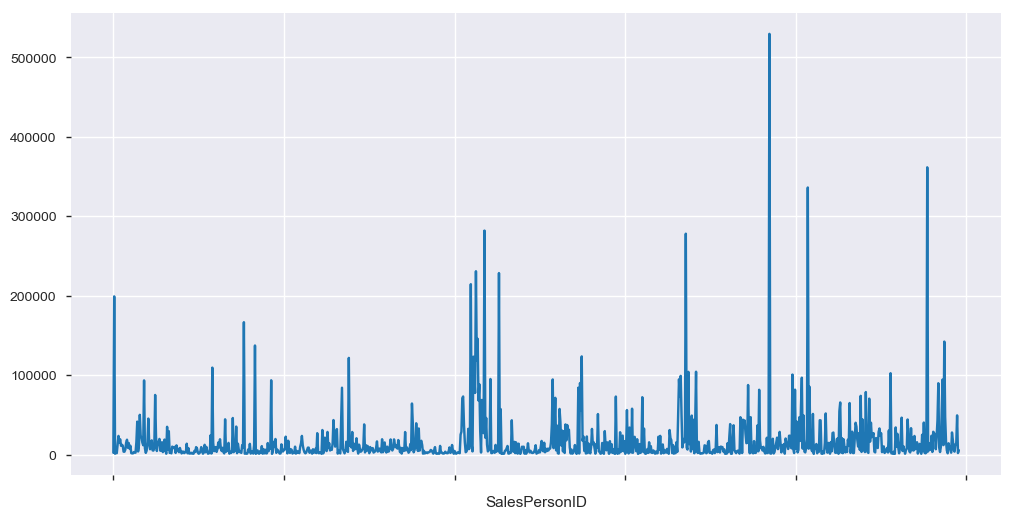

In [29]:
#Salesperson wise total sales
fig,axes = plt.subplots(figsize=(12,6))
revenue_plot = salesperson_totalsales.plot(kind='line') 

In [30]:
# Groupped total sales value by Sales Id
sales_quantity = sales.groupby('Suspicious').mean()['Quantity']
sales_quantity

Suspicious
No                13250.285323
Yes              137467.707182
indeterminate      3773.115118
Name: Quantity, dtype: float64

Text(0,0.5,'Quantity')

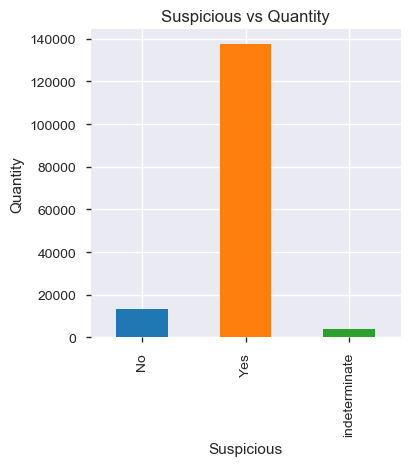

In [31]:
# Counter  plot for grouped sales quantity
fig, axes = plt.subplots(figsize=(4,4))
quantity_plot= sales_quantity.plot(kind='bar', title="Suspicious vs Quantity")
quantity_plot.set_xlabel('Suspicious')
quantity_plot.set_ylabel('Quantity')

In [32]:
#### Checking the sales break down by category
customes = sales [['SalesPersonID','Suspicious','Quantity']]
category_group = customes.groupby(['SalesPersonID','Suspicious']).sum()
category_group.unstack().T

SalesPersonID           C21116    C21118  C21119   C21121  C21122   C21123  \
         Suspicious                                                          
Quantity No              283.0  587465.0   166.0    140.0     NaN    100.0   
         Yes               NaN     110.0     NaN      NaN     NaN      NaN   
         indeterminate  1546.0  379364.0   304.0  16157.0  5965.0  30645.0   

SalesPersonID             C21124    C21126  C21127    C21128   ...     \
         Suspicious                                            ...      
Quantity No             169483.0     260.0   333.0     754.0   ...      
         Yes                 NaN       NaN     NaN    4583.0   ...      
         indeterminate   26167.0  186909.0   327.0  674547.0   ...      

SalesPersonID            C22336     C22337     C22339   C22340   C22341  \
         Suspicious                                                       
Quantity No                 NaN     1927.0   201294.0      NaN      NaN   
         Yes                NaN        NaN        NaN      NaN      NaN   
         indeterminate  60374.0  1384346.0  3959879.0  34677.0  17146.0   

SalesPersonID            C22342   C22343    C22344   C22347   C22348  
         Suspicious                                                   
Quantity No               106.0      NaN   94612.0      NaN    102.0  
         Yes                NaN      NaN    1245.0      NaN      NaN  
         indeterminate  94100.0  80834.0  220046.0  15468.0  26682.0  

[3 rows x 992 columns]

#### Feature engineering

In [33]:
sales['PricePerUnit']=sales.TotalSalesValue/sales.Quantity

Here we have started to Groupby SalesPersonID and ProductID and extracted the mean of the Quantity,TotalSalesValue,PricePerUnit column

In [34]:
sales.head()

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,PricePerUnit
0,C21116,PR6112,182,1665,indeterminate,9.148352
1,C21116,PR6112,182,1740,indeterminate,9.560440
2,C21116,PR6253,101,1040,indeterminate,10.297030
3,C21116,PR6253,283,4495,No,15.883392
4,C21116,PR6294,108,1465,indeterminate,13.564815


In [35]:
def group_By_with_TwoColumns(df,dfCol1,dfCol2,dfCol3,joinCond): 
    data=pd.merge(df,pd.DataFrame(df.groupby([dfCol1,dfCol2]).mean()[dfCol3]).reset_index(),on=[dfCol1,dfCol2],how=joinCond)
    return data

In [36]:
def group_By_with_SingleColumns(df,dfCol1,dfCol2,joinCond): 
    data=pd.merge(df,pd.DataFrame(df.groupby([dfCol1]).mean()[dfCol2]).reset_index(),on=[dfCol1],how=joinCond)
    return data

In [37]:
def renaming_Column(df,ac1,rc2,ac3,rc4):
    data=df.rename(index=str,columns={ac1:rc2,ac3:rc4})
    return data

In [38]:
def diff_between_two_columns(df,col1,col2):
    data=df[col1]-df[col2]
    return data

In [39]:
sales=group_By_with_TwoColumns(sales,'SalesPersonID','ProductID','Quantity','left')
sales=renaming_Column(sales,"Quantity_y","Avg_Qty_ProdID","Quantity_x","Quantity")

In [40]:
sales=group_By_with_TwoColumns(sales,'SalesPersonID','ProductID','TotalSalesValue','left')
sales=renaming_Column(sales,'TotalSalesValue_y','Avg_Tsale_prdID','TotalSalesValue_x',"TotalSalesValue")

In [41]:
sales=group_By_with_TwoColumns(sales,'SalesPersonID','ProductID','PricePerUnit','left')
sales=renaming_Column(sales,'PricePerUnit_y','Avg_PPerUnit_prdID','PricePerUnit_x','PricePerUnit')

In [42]:
sales=group_By_with_SingleColumns(sales,'SalesPersonID','Quantity','left')
sales=renaming_Column(sales,'Quantity_y','Avg_Qty','Quantity_x','Quantity')

In [43]:
sales=group_By_with_SingleColumns(sales,'SalesPersonID','TotalSalesValue','left')
sales=renaming_Column(sales,'TotalSalesValue_y','Avg_TSale','TotalSalesValue_x','TotalSalesValue')

In [44]:
sales=group_By_with_SingleColumns(sales,'SalesPersonID','PricePerUnit','left')
sales=renaming_Column(sales,'PricePerUnit_y','Avg_PPerUnit','PricePerUnit_x','PricePerUnit')

In [45]:
sales=group_By_with_SingleColumns(sales,'ProductID','Quantity','left')
sales=renaming_Column(sales,'Quantity_y','Avg_Qty_pProdID','Quantity_x','Quantity')

In [46]:
sales=group_By_with_SingleColumns(sales,'ProductID','TotalSalesValue','left')
sales=renaming_Column(sales,'TotalSalesValue_y','Avg_TsaleVal_ProdID','TotalSalesValue_x','TotalSalesValue')

In [47]:
sales=group_By_with_SingleColumns(sales,'ProductID','PricePerUnit','left')
sales=renaming_Column(sales,'PricePerUnit_y','Avg_PPerUnit_ProdID','PricePerUnit_x','PricePerUnit')

In [48]:
sales.head()

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,PricePerUnit,Avg_Qty_ProdID,Avg_Tsale_prdID,Avg_PPerUnit_prdID,Avg_Qty,Avg_TSale,Avg_PPerUnit,Avg_Qty_pProdID,Avg_TsaleVal_ProdID,Avg_PPerUnit_ProdID
0,C21116,PR6112,182,1665,indeterminate,9.148352,182.0,1715.0,9.423077,182.9,2408.0,12.592662,591.650888,6876.035503,14.164825
1,C21116,PR6112,182,1740,indeterminate,9.560440,182.0,1715.0,9.423077,182.9,2408.0,12.592662,591.650888,6876.035503,14.164825
2,C21116,PR6253,101,1040,indeterminate,10.297030,227.0,3327.5,13.215452,182.9,2408.0,12.592662,471.563320,5612.323552,16.161482
3,C21116,PR6253,283,4495,No,15.883392,227.0,3327.5,13.215452,182.9,2408.0,12.592662,471.563320,5612.323552,16.161482
4,C21116,PR6294,108,1465,indeterminate,13.564815,112.5,1662.5,14.731125,182.9,2408.0,12.592662,224.248227,5203.262411,20.898267


In [49]:
len(sales.columns)

15

 #### Looking for NaN's

In [50]:
#return a formatted percentage from a fraction
def percentage(numerator, denomenator):
    
    if type(numerator) == pd.core.series.Series:
        return (numerator/denomenator*100).map('{:.1f}%'.format)
    
    elif type(numerator) == int or type(numerator) == float:
        return '{:.1f}%'.format(float(numerator)/float(denomenator)*100) 
    
    else:
        print("check type")

In [51]:
#Get percentage by variable of values which are not NaN
percentage(sales.count()-1, sales.shape[0]-1)

SalesPersonID          100.0%
ProductID              100.0%
Quantity               100.0%
TotalSalesValue        100.0%
Suspicious             100.0%
PricePerUnit           100.0%
Avg_Qty_ProdID         100.0%
Avg_Tsale_prdID        100.0%
Avg_PPerUnit_prdID     100.0%
Avg_Qty                100.0%
Avg_TSale              100.0%
Avg_PPerUnit           100.0%
Avg_Qty_pProdID        100.0%
Avg_TsaleVal_ProdID    100.0%
Avg_PPerUnit_ProdID    100.0%
dtype: object

In [52]:
#df=sales[['SalesPersonID','ProductID','Quantity','TotalSalesValue','Suspicious','PricePerUnit']]
df=sales.iloc[:,0:6]

df.head()

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,PricePerUnit
0,C21116,PR6112,182,1665,indeterminate,9.148352
1,C21116,PR6112,182,1740,indeterminate,9.560440
2,C21116,PR6253,101,1040,indeterminate,10.297030
3,C21116,PR6253,283,4495,No,15.883392
4,C21116,PR6294,108,1465,indeterminate,13.564815


In [53]:
df['diff_Avg_Qty_ProdID']=diff_between_two_columns(sales,'Quantity','Avg_Qty_ProdID')
df['diff_Avg_Tsale_ProdID']=diff_between_two_columns(sales,'TotalSalesValue','Avg_Tsale_prdID') 
df['diff_Avg_PPerUnit_ProdID']=diff_between_two_columns(sales,'PricePerUnit','Avg_PPerUnit_prdID')

In [54]:
df['diff_Avg_Qty']=diff_between_two_columns(sales,'Quantity','Avg_Qty') 
df['diff_Avg_TSale']=diff_between_two_columns(sales,'TotalSalesValue','Avg_TSale')
df['diff_Avg_PPerUnit']= diff_between_two_columns(sales,'PricePerUnit','Avg_PPerUnit') 

In [55]:
df['diff_Avg_Qty_pProdID']=diff_between_two_columns(sales,'Quantity','Avg_Qty_pProdID')  
df['diff_Avg_TsaleVal_ProdID']=diff_between_two_columns(sales,'TotalSalesValue','Avg_TsaleVal_ProdID')
df['diff_Avg_PPerUnit_ProdID']=diff_between_two_columns(sales,'PricePerUnit','Avg_PPerUnit_ProdID')

In [56]:
len(df.columns)

14

In [57]:
df.head()

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,PricePerUnit,diff_Avg_Qty_ProdID,diff_Avg_Tsale_ProdID,diff_Avg_PPerUnit_ProdID,diff_Avg_Qty,diff_Avg_TSale,diff_Avg_PPerUnit,diff_Avg_Qty_pProdID,diff_Avg_TsaleVal_ProdID
0,C21116,PR6112,182,1665,indeterminate,9.148352,0.0,-50.0,-5.016473,-0.9,-743.0,-3.444311,-409.650888,-5211.035503
1,C21116,PR6112,182,1740,indeterminate,9.560440,0.0,25.0,-4.604385,-0.9,-668.0,-3.032223,-409.650888,-5136.035503
2,C21116,PR6253,101,1040,indeterminate,10.297030,-126.0,-2287.5,-5.864452,-81.9,-1368.0,-2.295633,-370.563320,-4572.323552
3,C21116,PR6253,283,4495,No,15.883392,56.0,1167.5,-0.278089,100.1,2087.0,3.290730,-188.563320,-1117.323552
4,C21116,PR6294,108,1465,indeterminate,13.564815,-4.5,-197.5,-7.333452,-74.9,-943.0,0.972152,-116.248227,-3738.262411


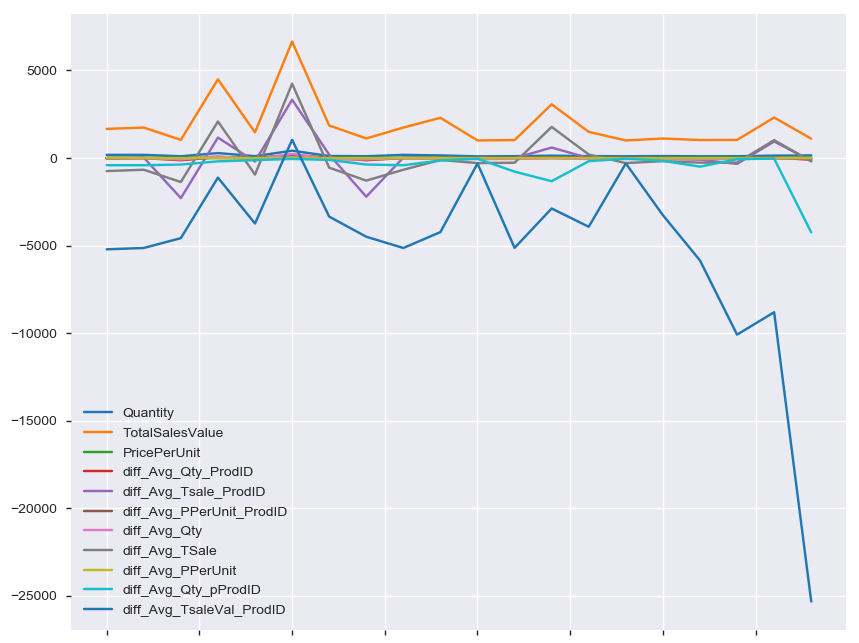

In [58]:
# Line plot
df.head(20).plot(kind='line', figsize=(10,8))
plt.show()

In [59]:
df.isnull().sum().sum() #Checking null values

0

In [60]:
df=df.drop(axis=1,columns=['ProductID','SalesPersonID']) #Dropped Prodcut Id and SalesPersonID columns
len(df.columns) #Checking number of columns after dropping two columns

12

In [61]:
# Re arranging the columns
df = df[['Quantity','TotalSalesValue','PricePerUnit',
       'diff_Avg_Qty_ProdID', 'diff_Avg_Tsale_ProdID',
       'diff_Avg_PPerUnit_ProdID', 'diff_Avg_Qty', 'diff_Avg_TSale',
       'diff_Avg_PPerUnit', 'diff_Avg_TsaleVal_ProdID',
       'diff_Avg_Qty_pProdID','Suspicious']]

In [62]:
#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
X = df.iloc[:,0:11] #all columns except the last one
X.head()

,Quantity,TotalSalesValue,PricePerUnit,diff_Avg_Qty_ProdID,diff_Avg_Tsale_ProdID,diff_Avg_PPerUnit_ProdID,diff_Avg_Qty,diff_Avg_TSale,diff_Avg_PPerUnit,diff_Avg_TsaleVal_ProdID,diff_Avg_Qty_pProdID
0,182,1665,9.148352,0.0,-50.0,-5.016473,-0.9,-743.0,-3.444311,-5211.035503,-409.650888
1,182,1740,9.560440,0.0,25.0,-4.604385,-0.9,-668.0,-3.032223,-5136.035503,-409.650888
2,101,1040,10.297030,-126.0,-2287.5,-5.864452,-81.9,-1368.0,-2.295633,-4572.323552,-370.563320
3,283,4495,15.883392,56.0,1167.5,-0.278089,100.1,2087.0,3.290730,-1117.323552,-188.563320
4,108,1465,13.564815,-4.5,-197.5,-7.333452,-74.9,-943.0,0.972152,-3738.262411,-116.248227


In [63]:
y =df.iloc[:,11] #only the last column
y.head()

0    indeterminate
1    indeterminate
2    indeterminate
3               No
4    indeterminate
Name: Suspicious, dtype: object

In [64]:
# split X and y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val =train_test_split(X,y,test_size=0.25,random_state=0)

In [65]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(31936, 11)
(10646, 11)
(31936,)
(10646,)


In [66]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train=s.fit_transform(X_train)
X_val=s.transform(X_val)

In [67]:
from sklearn.cluster import KMeans # Clustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [68]:
# Lets stick to default Hyperparametrs as of now. We shall tune the best model
log_reg = LogisticRegression(random_state= 42)
svc = SVC(random_state= 42)
rf = RandomForestClassifier(random_state= 42,n_estimators = 100,n_jobs=-1,class_weight="balanced")
ada = AdaBoostClassifier(random_state= 42)
xgb = XGBClassifier(random_state= 42)

In [69]:
def training_predict(trainer, X_train, Y_train, X_test, Y_test):
    scores = {} # Initializing a Dictionary to store evaluation metrics    
    trainer.fit(X_train, Y_train)  # Training
    Y_pred = trainer.predict(X_test) # Predicts  
    scores['Accuracy_test'] = accuracy_score(Y_test , Y_pred)    
    scores['Recall_test'] = recall_score(Y_test , Y_pred,average='macro')    
    scores['Precision_test'] = precision_score(Y_test , Y_pred,average='macro')    
    return scores

In [70]:
# Ignore the error
predictors = {} # Initializing a dictionary to store training and testing data
for model in [log_reg, svc, rf, ada, xgb]: # these are our objects that we instantiated above. We loop through them
    model_name = model.__class__.__name__
    predictors[model_name]  = {}
    predictors[model_name] =  training_predict(model, X_train, y_train, X_val, y_val)#Scores that is returned from trainer goes to
                                                                             # the respective predictor    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [71]:
pd.DataFrame(predictors).T

,Accuracy_test,Precision_test,Recall_test
LogisticRegression,0.937347,0.677021,0.363653
SVC,0.938099,0.875446,0.366895
RandomForestClassifier,0.956509,0.860581,0.603513
AdaBoostClassifier,0.937253,0.689097,0.459108
XGBClassifier,0.943829,0.829497,0.528989


In [217]:
dt = RandomForestClassifier(n_estimators =10,n_jobs=1,random_state = 42,class_weight="balanced",max_depth =6)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_val, y_val)
print("Testing score: ",dt_score_test)

Training score:  0.8041708416833667
Testing score:  0.8018034942701484


In [218]:
train_pred_dt=dt.predict(X_train)
test_pred_dt=dt.predict(X_val)

In [219]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [220]:
print("Accuracy:",metrics.accuracy_score(y_train, train_pred_dt))
print("Precision:",metrics.precision_score(y_train, train_pred_dt,average='weighted'))
print("Recall:",metrics.recall_score(y_train, train_pred_dt,average='weighted'))
print("F1 score:",metrics.f1_score(y_train,train_pred_dt,average='weighted'))

Accuracy: 0.8041708416833667
Precision: 0.9240693875500076
Recall: 0.8041708416833667
F1 score: 0.8492197977617361


In [221]:
print(classification_report(y_train,train_pred_dt))

               precision    recall  f1-score   support

           No       0.19      0.66      0.29      1925
          Yes       0.42      0.90      0.57       136
indeterminate       0.97      0.81      0.89     29875

  avg / total       0.92      0.80      0.85     31936



In [222]:
print(classification_report(y_val,test_pred_dt))

               precision    recall  f1-score   support

           No       0.18      0.61      0.27       630
          Yes       0.30      0.64      0.41        45
indeterminate       0.97      0.81      0.89      9971

  avg / total       0.92      0.80      0.85     10646



### Test Data 

In [78]:
# Reading test data using pandas for excel
sales_test = load_Salesmane_data('Test.xlsx')

In [79]:
sales_test.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue
0,Rep70101,C21844,PR6483,102,1115
1,Rep70102,C21844,PR6251,102,1050
2,Rep70103,C21844,PR6253,344,3490
3,Rep70104,C21844,PR6378,108,1095
4,Rep70105,C21844,PR6463,146,1055


In [80]:
sales_test['PricePerUnit']=sales_test.TotalSalesValue/sales_test.Quantity

In [81]:
sales_test=group_By_with_TwoColumns(sales_test,'SalesPersonID','ProductID','Quantity','left')
sales_test=renaming_Column(sales_test,"Quantity_y","Avg_Qty_ProdID","Quantity_x","Quantity")

In [82]:
sales_test=group_By_with_TwoColumns(sales_test,'SalesPersonID','ProductID','TotalSalesValue','left')
sales_test=renaming_Column(sales_test,'TotalSalesValue_y','Avg_Tsale_prdID','TotalSalesValue_x',"TotalSalesValue")

In [83]:
sales_test=group_By_with_TwoColumns(sales_test,'SalesPersonID','ProductID','PricePerUnit','left')
sales_test=renaming_Column(sales_test,'PricePerUnit_y','Avg_PPerUnit_prdID','PricePerUnit_x','PricePerUnit')

In [84]:
sales_test=group_By_with_SingleColumns(sales_test,'SalesPersonID','Quantity','left')
sales_test=renaming_Column(sales_test,'Quantity_y','Avg_Qty','Quantity_x','Quantity')

In [85]:
sales_test=group_By_with_SingleColumns(sales_test,'SalesPersonID','TotalSalesValue','left')
sales_test=renaming_Column(sales_test,'TotalSalesValue_y','Avg_TSale','TotalSalesValue_x','TotalSalesValue')

In [86]:
sales_test=group_By_with_SingleColumns(sales_test,'SalesPersonID','PricePerUnit','left')
sales_test=renaming_Column(sales_test,'PricePerUnit_y','Avg_PPerUnit','PricePerUnit_x','PricePerUnit')

In [87]:
sales_test=group_By_with_SingleColumns(sales_test,'ProductID','Quantity','left')
sales_test=renaming_Column(sales_test,'Quantity_y','Avg_Qty_pProdID','Quantity_x','Quantity')

In [88]:
sales_test=group_By_with_SingleColumns(sales_test,'ProductID','TotalSalesValue','left')
sales_test=renaming_Column(sales_test,'TotalSalesValue_y','Avg_TsaleVal_ProdID','TotalSalesValue_x','TotalSalesValue')

In [89]:
sales_test=group_By_with_SingleColumns(sales_test,'ProductID','PricePerUnit','left')
sales_test=renaming_Column(sales_test,'PricePerUnit_y','Avg_PPerUnit_ProdID','PricePerUnit_x','PricePerUnit')

In [90]:
sales_test.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,PricePerUnit,Avg_Qty_ProdID,Avg_Tsale_prdID,Avg_PPerUnit_prdID,Avg_Qty,Avg_TSale,Avg_PPerUnit,Avg_Qty_pProdID,Avg_TsaleVal_ProdID,Avg_PPerUnit_ProdID
0,Rep70101,C21844,PR6483,102,1115,10.931373,102.0,1115.0,10.931373,147.3,1422.0,10.051409,192.702128,1840.106383,9.589537
1,Rep70102,C21844,PR6251,102,1050,10.294118,102.0,1050.0,10.294118,147.3,1422.0,10.051409,387.523077,3268.692308,10.807918
2,Rep70103,C21844,PR6253,344,3490,10.145349,225.5,2252.5,9.815665,147.3,1422.0,10.051409,729.142384,5101.100993,12.240047
3,Rep70104,C21844,PR6378,108,1095,10.138889,108.0,1095.0,10.138889,147.3,1422.0,10.051409,130.835443,2788.544304,20.299865
4,Rep70105,C21844,PR6463,146,1055,7.226027,155.8,1071.0,7.159729,147.3,1422.0,10.051409,204.454545,1558.636364,8.386834


In [91]:
len(sales_test.columns)

15

In [92]:
df_test=sales_test.iloc[:,0:6]

df_test.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,PricePerUnit
0,Rep70101,C21844,PR6483,102,1115,10.931373
1,Rep70102,C21844,PR6251,102,1050,10.294118
2,Rep70103,C21844,PR6253,344,3490,10.145349
3,Rep70104,C21844,PR6378,108,1095,10.138889
4,Rep70105,C21844,PR6463,146,1055,7.226027


In [93]:
df_test['diff_Avg_Qty_ProdID']=diff_between_two_columns(sales_test,'Quantity','Avg_Qty_ProdID')
df_test['diff_Avg_Tsale_ProdID']=diff_between_two_columns(sales_test,'TotalSalesValue','Avg_Tsale_prdID') 
df_test['diff_Avg_PPerUnit_ProdID']=diff_between_two_columns(sales_test,'PricePerUnit','Avg_PPerUnit_prdID')

In [94]:
df_test['diff_Avg_Qty']=diff_between_two_columns(sales_test,'Quantity','Avg_Qty') 
df_test['diff_Avg_TSale']=diff_between_two_columns(sales_test,'TotalSalesValue','Avg_TSale')
df_test['diff_Avg_PPerUnit']= diff_between_two_columns(sales_test,'PricePerUnit','Avg_PPerUnit') 

In [95]:
df_test['diff_Avg_Qty_pProdID']=diff_between_two_columns(sales_test,'Quantity','Avg_Qty_pProdID')  
df_test['diff_Avg_TsaleVal_ProdID']=diff_between_two_columns(sales_test,'TotalSalesValue','Avg_TsaleVal_ProdID')
df_test['diff_Avg_PPerUnit_ProdID']=diff_between_two_columns(sales_test,'PricePerUnit','Avg_PPerUnit_ProdID')

In [96]:
len(df_test.columns)

14

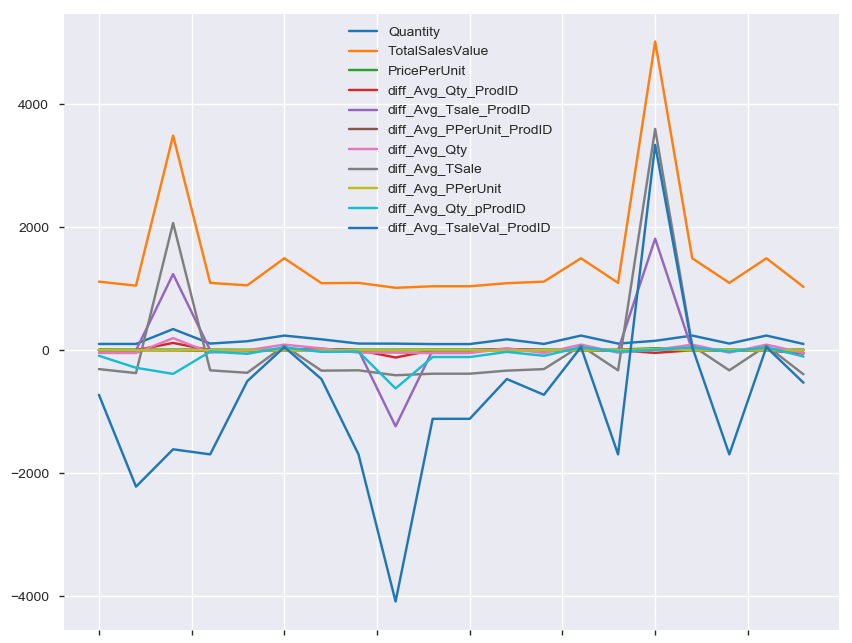

In [97]:
# Line plot
df_test.head(20).plot(kind='line', figsize=(10,8))
plt.show()

<Figure size 1600x600 with 0 Axes>

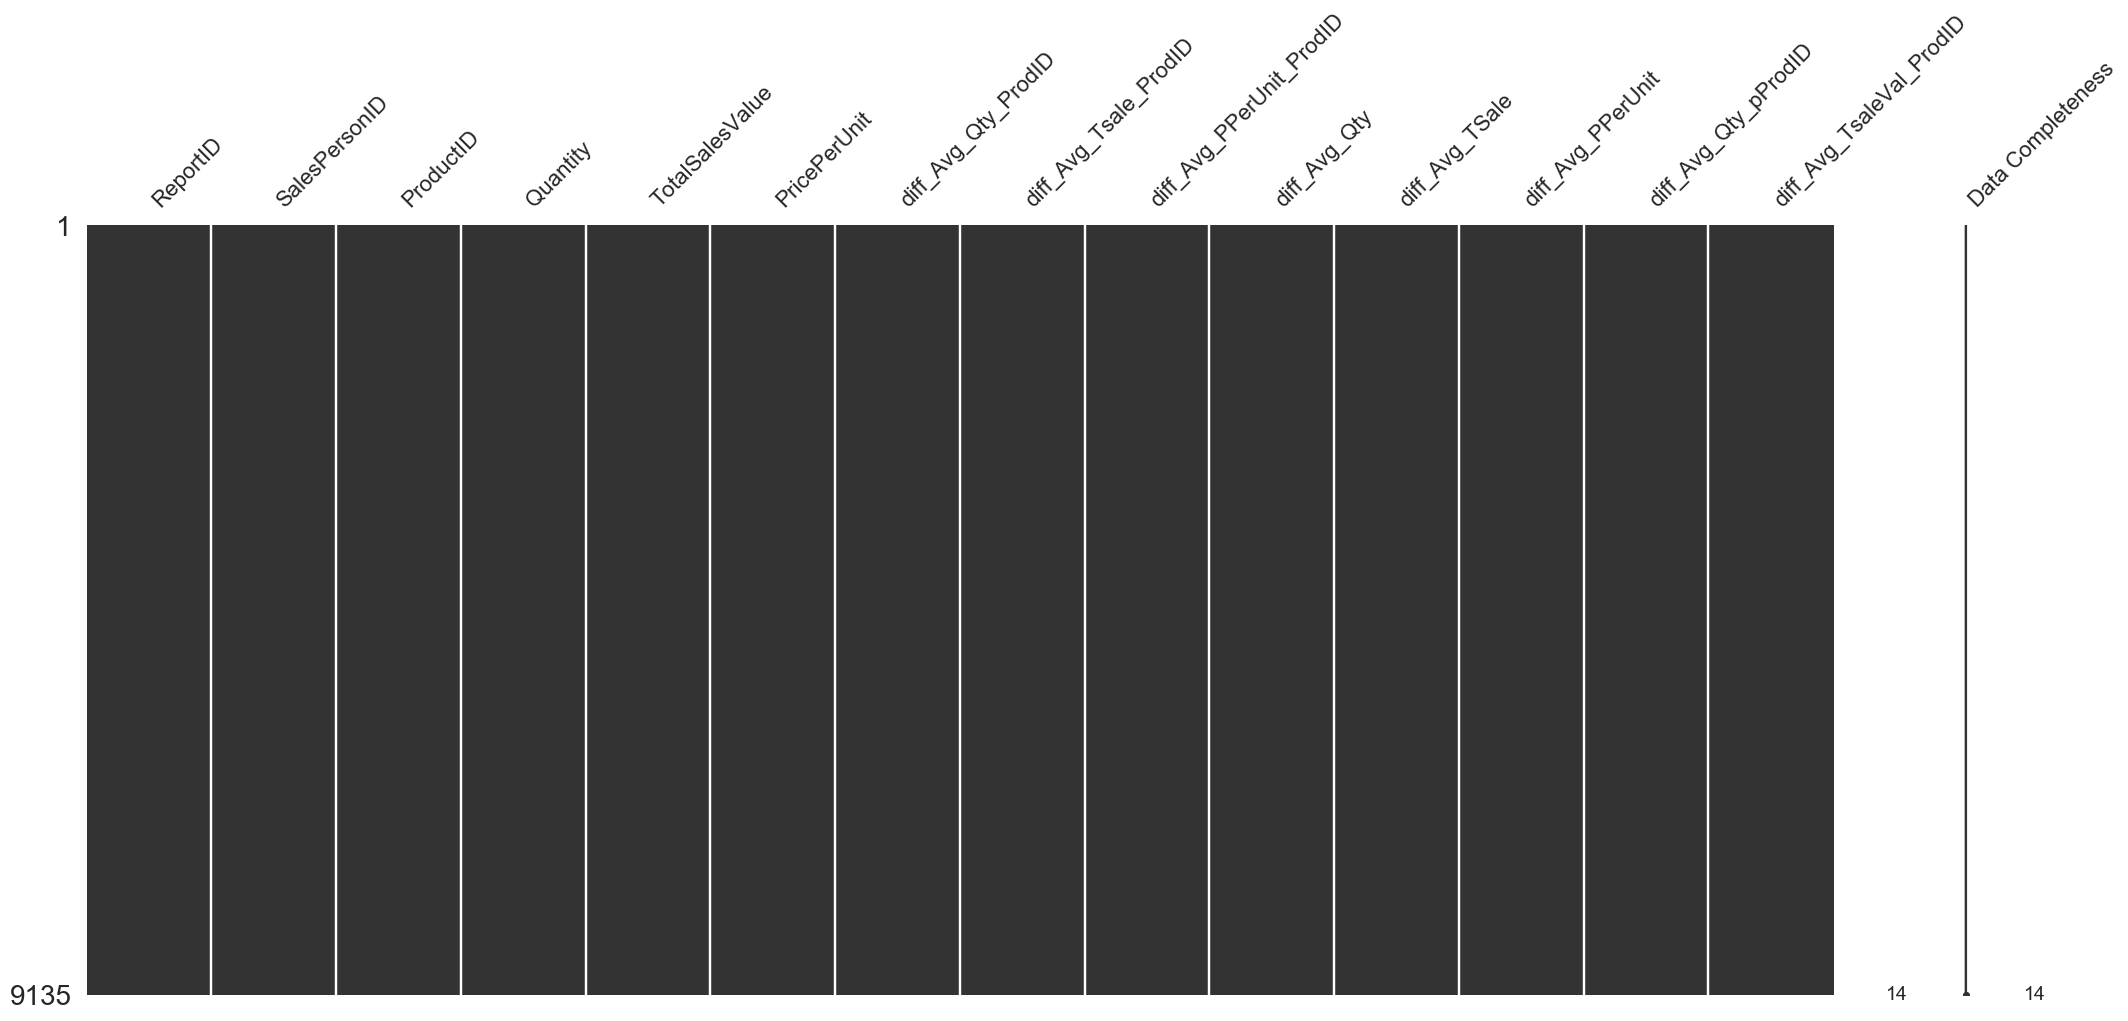

ReportID has NO missing value!
SalesPersonID has NO missing value!
ProductID has NO missing value!
Quantity has NO missing value!
TotalSalesValue has NO missing value!
PricePerUnit has NO missing value!
diff_Avg_Qty_ProdID has NO missing value!
diff_Avg_Tsale_ProdID has NO missing value!
diff_Avg_PPerUnit_ProdID has NO missing value!
diff_Avg_Qty has NO missing value!
diff_Avg_TSale has NO missing value!
diff_Avg_PPerUnit has NO missing value!
diff_Avg_Qty_pProdID has NO missing value!
diff_Avg_TsaleVal_ProdID has NO missing value!


In [98]:
# Checking the missing values 
plt.figure(figsize=(16,6))
msno.matrix(df_test,labels=True,color=(0.20,0.20,0.20))
plt.show()
for c in df_test.columns:
    miss = df_test[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

In [99]:
percentage(df_test.count()-1, df_test.shape[0]-1)

ReportID                    100.0%
SalesPersonID               100.0%
ProductID                   100.0%
Quantity                    100.0%
TotalSalesValue             100.0%
PricePerUnit                100.0%
diff_Avg_Qty_ProdID         100.0%
diff_Avg_Tsale_ProdID       100.0%
diff_Avg_PPerUnit_ProdID    100.0%
diff_Avg_Qty                100.0%
diff_Avg_TSale              100.0%
diff_Avg_PPerUnit           100.0%
diff_Avg_Qty_pProdID        100.0%
diff_Avg_TsaleVal_ProdID    100.0%
dtype: object

In [100]:
df_test.isnull().sum().sum() #Checking null values

0

In [101]:
df_test=df_test.drop(axis=1,columns=['ReportID','ProductID','SalesPersonID']) #Dropped Prodcut Id and SalesPersonID columns
len(df_test.columns) #Checking number of columns after dropping two columns  #'ReportID',

11

In [102]:
list(df_test.columns)

['Quantity',
 'TotalSalesValue',
 'PricePerUnit',
 'diff_Avg_Qty_ProdID',
 'diff_Avg_Tsale_ProdID',
 'diff_Avg_PPerUnit_ProdID',
 'diff_Avg_Qty',
 'diff_Avg_TSale',
 'diff_Avg_PPerUnit',
 'diff_Avg_Qty_pProdID',
 'diff_Avg_TsaleVal_ProdID']

In [103]:
df_test.dtypes

Quantity                      int64
TotalSalesValue               int64
PricePerUnit                float64
diff_Avg_Qty_ProdID         float64
diff_Avg_Tsale_ProdID       float64
diff_Avg_PPerUnit_ProdID    float64
diff_Avg_Qty                float64
diff_Avg_TSale              float64
diff_Avg_PPerUnit           float64
diff_Avg_Qty_pProdID        float64
diff_Avg_TsaleVal_ProdID    float64
dtype: object

In [104]:
Y_test_pred = dt.predict(df_test)

In [105]:
list(Y_test_pred)

['Yes',
 'indeterminate',
 'Yes',
 'indeterminate',
 'Yes',
 'No',
 'Yes',
 'indeterminate',
 'Yes',
 'indeterminate',
 'indeterminate',
 'Yes',
 'Yes',
 'No',
 'indeterminate',
 'Yes',
 'No',
 'indeterminate',
 'No',
 'Yes',
 'Yes',
 'No',
 'indeterminate',
 'indeterminate',
 'No',
 'Yes',
 'indeterminate',
 'Yes',
 'indeterminate',
 'indeterminate',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'indeterminate',
 'Yes',
 'No',
 'indeterminate',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'indeterminate',
 'Yes',
 'Yes',
 'indeterminate',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'indeterminate',
 'Yes',
 'No',
 'No',
 'Yes',
 'indeterminate',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'indeterminate',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'indeterminate',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes'

In [106]:
test_result = pd.DataFrame(Y_test_pred,columns = ['Suspicious'])
result=test_result.Suspicious.replace({'indeterminate':0,'Yes':1,'No':2})

In [107]:
result.to_csv('samplesubmission.csv', sep=',')